# Welcome to SmartInvestment.com 
Our company sells investment funds tailored to maximise results and minimise risk. Our star fund is called FAANG+_forever.

### About FAANG+_forever
If we take a look into the market data of each one of these we can find out how well we are performaing. Stocks included are from META, NFLX, aapl, TSLA, GOOGL, AAMZ.

In [120]:
#Importing packages
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
#Importing dataframes
df_aapl = pd.concat([pd.read_csv('market_data/AAPL_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/AAPL_1.csv', parse_dates=['Date'])], ignore_index=True)
df_amzn = pd.concat([pd.read_csv('market_data/AMZN_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/AMZN_1.csv', parse_dates=['Date'])], ignore_index=True)
df_googl = pd.concat([pd.read_csv('market_data/GOOGL_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/GOOGL_1.csv', parse_dates=['Date'])], ignore_index=True)
df_meta = pd.concat([pd.read_csv('market_data/META_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/META_1.csv', parse_dates=['Date'])], ignore_index=True)
df_nflx = pd.concat([pd.read_csv('market_data/NFLX_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/NFLX_1.csv', parse_dates=['Date'])], ignore_index=True)
df_spx = pd.concat([pd.read_csv('market_data/SPX_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/SPX_1.csv', parse_dates=['Date'])], ignore_index=True)
df_tsla = pd.concat([pd.read_csv('market_data/TSLA_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/TSLA_1.csv', parse_dates=['Date'])], ignore_index=True)

#Parsing dates
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'], utc=True).dt.date
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'], format = '%Y%m')
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'], utc=True).dt.date
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'], format = '%Y%m')
df_googl['Date'] = pd.to_datetime(df_googl['Date'], utc=True).dt.date
df_googl['Date'] = pd.to_datetime(df_googl['Date'], format = '%Y%m')
df_meta['Date'] = pd.to_datetime(df_meta['Date'], utc=True).dt.date
df_meta['Date'] = pd.to_datetime(df_meta['Date'], format = '%Y%m')
df_nflx['Date'] = pd.to_datetime(df_nflx['Date'], utc=True).dt.date
df_nflx['Date'] = pd.to_datetime(df_nflx['Date'], format = '%Y%m')
df_tsla['Date'] = pd.to_datetime(df_tsla['Date'], utc=True).dt.date
df_tsla['Date'] = pd.to_datetime(df_tsla['Date'], format = '%Y%m')
df_spx['Date'] = pd.to_datetime(df_spx['Date'], utc=True).dt.date
df_spx['Date'] = pd.to_datetime(df_spx['Date'], format = '%Y%m')

#### Time to find some insights...
We need to provide to our investors a quarter by quarter report with the performance of the fund comparing it with the performance of the SPX500. Let's take a look at our datasets.

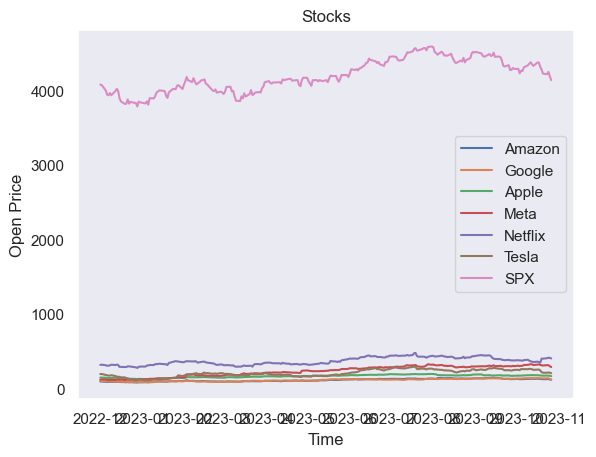

In [122]:
sns.set(style="dark")
sns.lineplot(x='Date', y='Close', data=df_amzn, label='Amazon')
sns.lineplot(x='Date', y='Close', data=df_googl, label='Google')
sns.lineplot(x='Date', y='Close', data=df_aapl, label='Apple')
sns.lineplot(x='Date', y='Close', data=df_meta, label='Meta')
sns.lineplot(x='Date', y='Close', data=df_nflx, label='Netflix')
sns.lineplot(x='Date', y='Close', data=df_tsla, label='Tesla')
sns.lineplot(x='Date', y='Close', data=df_spx, label='SPX')
plt.title('Stocks')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.show()

As the data is incomplete, we will remove data from first and last week. Considering 2022-12-01 is week 48 of 2022 and 2023-10-26 is week 43 of 2023 for all of the datasets. Next group by quarter.
### SPX

In [125]:
df_spx['WeekNumber'] = pd.to_datetime(df_spx['Date']).dt.isocalendar().week
df_spx = df_spx[~((df_spx['WeekNumber'] == df_spx['Date'].min().isocalendar().week) & (df_spx['Date'].dt.year == 2022))]
df_spx = df_spx[~((df_spx['WeekNumber'] == df_spx['Date'].max().isocalendar().week) & (df_spx['Date'].dt.year == 2023))]
df_spx['Quarter'] = df_spx['Date'].dt.quarter
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_spx['Quarter'] = df_spx['Quarter'].map(quarter_mapping)
df_spx['Gain_Loss_Percentage'] = df_spx['Close'].pct_change() * 100
pivot_table_spx = df_spx.pivot_table(index='Quarter', values='Gain_Loss_Percentage', aggfunc='sum')
# print(pivot_table_spx)

### Fund data

In [126]:
fund_composition = {
    'META': 0.15,
    'NFLX': 0.10,
    'AAPL': 0.25,
    'TSLA': 0.15,
    'GOOGL': 0.20,
    'AMZN': 0.15
}

# Create a new dataframe for fund
df_aapl['Ticker'] = 'AAPL'
df_amzn['Ticker'] = 'AMZN'
df_googl['Ticker'] = 'GOOGL'
df_meta['Ticker'] = 'META'
df_nflx['Ticker'] = 'NFLX'
df_tsla['Ticker'] = 'TSLA'
df_fund = pd.concat([df_aapl, df_amzn, df_googl, df_meta, df_nflx, df_tsla], ignore_index=True)
df_fund['WeekNumber'] = pd.to_datetime(df_fund['Date']).dt.isocalendar().week
df_fund = df_fund[~((df_fund['WeekNumber'] == df_fund['Date'].min().isocalendar().week) & (df_fund['Date'].dt.year == 2022))]
df_fund = df_fund[~((df_fund['WeekNumber'] == df_fund['Date'].max().isocalendar().week) & (df_fund['Date'].dt.year == 2023))]
df_fund['Quarter'] = df_fund['Date'].dt.quarter
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_fund['Quarter'] = df_fund['Quarter'].map(quarter_mapping)
df_fund['gain_loss_percentage'] = df_fund['Close'].pct_change() * 100
df_fund['fund_composition'] = df_fund['Ticker'].map(fund_composition)
grouped_df = df_fund.groupby(['Quarter', 'fund_composition'])['gain_loss_percentage'].sum().reset_index()
grouped_df['gain_loss_weighted'] = grouped_df['fund_composition']*grouped_df['gain_loss_percentage']
pivot_table_fund = grouped_df.pivot_table(index='Quarter', values='gain_loss_weighted', aggfunc='sum')

In [129]:
bla = pd.merge(pivot_table_fund, pivot_table_spx, on=['Quarter'], how='outer')
bla['Fund vs SPX %'] = bla['gain_loss_weighted'] - bla['Gain_Loss_Percentage']
print(bla)
# columns_to_print = ['Fund Gain/Loss %', 'SPX Gain/Loss %', 'Fund vs SPX %']

         gain_loss_weighted  Gain_Loss_Percentage  Fund vs SPX %
Quarter                                                         
Q1                32.763464              7.136581      25.626883
Q2                22.200442              8.148288      14.052154
Q3                -1.946505             -3.570565       1.624060
Q4               -33.645869             -2.816246     -30.829623


Now that we've seen how our fund is performing overall, lets take a look at the data per week of the fund and SPX.